## Rank Based Recomendation system

This is highly useful when we don't have the Information about the user. Then we recommend the Some of the most used with best rated products in the catelog

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'..\Data\Processed_matrix.csv', index_col='UserId')
df.shape

(4456, 850)

In [3]:
df.head()

,B000052WYD,B000052YJM,B000052YM4,B000052YM7,B000052YP6,B0000530ED,B0000536P4,B0000632EN,B00006FRW7,B00006JN4F,...,B00KAL5JAU,B00KCFAZTE,B00KCTER3U,B00KD73PBQ,B00KH6F6TM,B00KHGIK54,B00KHH2VOY,B00KQBR9FM,B00KQVTX06,B00KTLBEEQ
UserId,,,,,,,,,,,,,,,,,,,,,
A02155413BVL8D0G7X6DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03364251DGXSGA9PSR99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A099766128UI0NCS98N1E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100VQNP6I54HS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
prod_rating_count = (df!=0).sum()
prod_mean_rating = df.replace(0, pd.NA).mean().round(2)

prod_summary = pd.DataFrame({
    'MeanRating': prod_mean_rating,
    'RatingCount': prod_rating_count
})

prod_summary['MeanRating'] = prod_summary['MeanRating'].astype(float).round(2)

prod_summary.head()

,MeanRating,RatingCount
B000052WYD,3.68,22
B000052YJM,4.29,24
B000052YM4,3.95,21
B000052YM7,4.32,40
B000052YP6,4.43,23


In [5]:
data = prod_summary.copy()

In [9]:
ranked_order = data.sort_values(['MeanRating', 'RatingCount'], ascending=[False, False])
ranked_order.head(30)

,MeanRating,RatingCount
B002SWAFVM,5.00,24
B00JQ12U0M,5.00,23
B003CGYUH8,5.00,21
B00IU2C148,5.00,21
B00KH6F6TM,4.97,35
B00I2495QG,4.97,33
B00A1Y177A,4.96,28
B00CEPM91M,4.96,24
B003ZTVDBS,4.96,23
B004DJUHMA,4.96,23


<Axes: xlabel='RatingCount', ylabel='Count'>

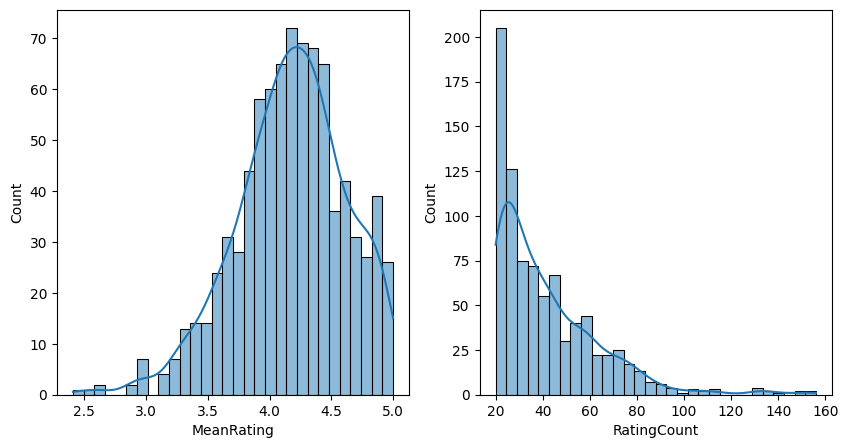

In [10]:
# Just looking for the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(data.MeanRating, bins = 30, kde=True)
plt.subplot(1,2,2)
sns.histplot(data.RatingCount, bins = 30, kde=True)


In [11]:
ranked_order.to_csv('../Data/Ranked_result.csv', index=False)

In [12]:
# Say we need to get only top 5 recommendation
num_prod = 5
ranked_order.head(num_prod).index

Index(['B002SWAFVM', 'B00JQ12U0M', 'B003CGYUH8', 'B00IU2C148', 'B00KH6F6TM'], dtype='object')